## **Assignment – 771766 Fundamentals of Data Science PROJECT**

<b>Introduction:</b>
This notebook consist of 3 seperate parts:
- Reading in the data file
- Cleaning the data and ensuring that it is usable
- Analyzing and Visualizing the data so that it can be understood easier and used in both the presentation and the report


### **Downloading and importing required libraries**

In [ ]:
!pip install word2number

  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=b181aad8ad3ab6ff8af08cbcf752d04baaacc453bf6cc0f4507c0d95abeecbe0
  Stored in directory: /root/.cache/pip/wheels/4b/c3/77/a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number


In [ ]:
import pandas as pd
import seaborn as sns
import itertools 
from word2number import w2n 
import matplotlib.pyplot as plt

## **Step One - Reading in the data file:**
Here the file is read in using pandas and assigned to a variable so that changes are not being made to the file and there is no unecassary opening and closing of the file. 

In [ ]:
censusData = pd.read_csv('/census_17.csv')
censusData.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,May Road,Victor,Newton-Smith,44,Head,Single,Male,Public relations account executive,None,Methodist
1,1,May Road,Clare,Bennett,43,Partner,Single,Female,Sports coach,None,None
2,1,May Road,Sophie,Newton-Smith,7,Daughter,NaN,Female,Student,None,NaN
3,2,May Road,Frances,Singh,43,Head,Single,Female,Agricultural consultant,None,Christian
4,2,May Road,Ruth,Singh,17,Daughter,NaN,Female,Student,None,NaN


## **Step Two - Cleaning the Data**
This part consists of multiple steps to ensure that the data is usable and valid and there are no missing values and no miss leading data. 

It makes sense to first check how many missing values are in the data, so it can be understood what needs to be done.

In [ ]:
#Find any columns with missing and null values, this also includes any filled with NA so this will need to be changed
columsWMissing = censusData.columns[censusData.isnull().any()]
censusData[columsWMissing].isnull().sum()

House Number         2
First Name           2
Marital Status    2243
Religion          2298
dtype: int64

The above cell outputs House Number - 2, First Name - 2,Marital Status - 2243, Religion - 2298<br>
Further checks will need to be done on Marital Status and Religion as N/A is a valid answer for this column, so it needs to be checked for values that are incorrect and not N/A. 
NA is not valid for House Number and First Name so this can be looked at and resolved first. 

### <b>Class for converting to the correct data types</b>

In [ ]:
#Contains functions for converting data to an int, float, string and to lower case
class conversion():
    def convertToInt(dataFrame, columnName):
        for i in range(len(dataFrame)):
            try:
                #Try and cast to an int
                dataFrame[columnName][i] = int(dataFrame[columnName][i])
            except:
                #if it fails show the row it has failed on so a decision can be made on what to do with it 
                problematicRows.append(i)
                print(f'ERROR IN DATA ON ROW: {i}')
                print(f'PROBLEMATIC ROW IS: \n {dataFrame.iloc[i]}')
                
                #Check for first and last item in dataframe so not trying to check out of index range
                if i == len(dataFrame) -1:
                    print(f'NO ROW AFTER THIS, ROW BEFORE IS: \n {dataFrame.iloc[i-1]}')
                if i == 0:
                    print(f'NO ROW BEFORE, ROW AFTER IS: \n {dataFrame.iloc[i+1]}')
                else: 
                    print(f'ROW BEFORE IS: \n {dataFrame.iloc[i-1]}')
                    print(f'ROW AFTER IS: \n {dataFrame.iloc[i+1]}')
        return problematicRows #In case it is need to delete rows or manually update them

    #Try to convert to a float
    def convertToFloat(dataFrame, columnName):
        for i in range(len(dataFrame)):
            try:
                dataFrame[columnName][i] = float(dataFrame[columnName][i])
            except:
                problematicRows.append(i)
                print(dataFrame.iloc[i])
        print(f'NUMBER OF ERRORS: {len(problematicRows)}')
        return problematicRows
    
    #try to convert to a string
    def convertToString(dataFrame, columnName):
        for i in range (len(dataFrame)):
            try:
                dataFrame[columnName][i] = str(dataFrame[columnName][i])
            except: 
                problematicRows.append(i)
        print(f'NUMBER OF ERRORS: {len(problematicRows)}')
        return problematicRows
    
    #Convert to Lower
    def convertToLower(dataFrame, columnName):
        for i in range(len(dataFrame)):
            dataFrame[columnName][i] = dataFrame[columnName][i].lower()

### <b>Correcting House Number</b>

In [ ]:
#Try and convert the house numbers to int, also check for missing values
problematicRows = []
conversion.convertToInt(censusData, 'House Number')

ERROR IN DATA ON ROW: 37
PROBLEMATIC ROW IS: 
 House Number                                           NaN
Street                                            May Road
First Name                                          Bethan
Surname                                                Lee
Age                                                     64
Relationship to Head of House                         Wife
Marital Status                                     Married
Gender                                              Female
Occupation                       Conference centre manager
Infirmity                                             None
Religion                                         Christian
Name: 37, dtype: object
ROW BEFORE IS: 
 House Number                                            13
Street                                            May Road
First Name                                           Conor
Surname                                                Lee
Age                        

[37, 123, 135]

handling the three problementic rows

In [ ]:
#Show the records with the missing House Number
censusData[censusData['House Number'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
37,NaN,May Road,Bethan,Lee,64,Wife,Married,Female,Conference centre manager,None,Christian
123,NaN,May Road,Ann,Brown,30,Head,Divorced,Female,IT consultant,None,None


Let's check if anyone with their surname lives down the same street as them.

In [ ]:
#For row 37
censusData.loc[(censusData['Surname'] == censusData.iloc[37]['Surname'])&(censusData['Street'] == censusData.iloc[37]['Street'])] # Return rows with same surname and street

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
36,13,May Road,Conor,Lee,65,Head,Married,Male,"Education officer, museum",None,Christian
37,NaN,May Road,Bethan,Lee,64,Wife,Married,Female,Conference centre manager,None,Christian
38,13,May Road,Danielle,Lee,22,Granddaughter,Divorced,Female,University Student,None,None


We can deduce from following information like age, relationship, status that these rows match and fit together , Bethan-Lee is Conors's Wife and lives with him at house 13.

In [ ]:
censusData.at[37, 'House Number'] = '13' # Set to 13

In [ ]:
#checking
censusData.loc[(censusData['Surname'] == censusData.iloc[37]['Surname'])&(censusData['Street'] == censusData.iloc[37]['Street'])] # Return rows with same surname and street

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
36,13,May Road,Conor,Lee,65,Head,Married,Male,"Education officer, museum",None,Christian
37,13,May Road,Bethan,Lee,64,Wife,Married,Female,Conference centre manager,None,Christian
38,13,May Road,Danielle,Lee,22,Granddaughter,Divorced,Female,University Student,None,None


In [ ]:
#For row 123	
censusData.loc[(censusData['Surname'] == censusData.iloc[123]['Surname'])&(censusData['Street'] == censusData.iloc[123]['Street'])] # Return rows with same surname and street

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
123,NaN,May Road,Ann,Brown,30,Head,Divorced,Female,IT consultant,None,None


In [ ]:
#Checking for her daughter or son since she is Divorced
censusData.loc[(censusData['Street'] == censusData.iloc[123]['Street'])&(censusData['Relationship to Head of House'] == 'Son')&(censusData['Surname'] == censusData.iloc[123]['Surname'])]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


Ann Brown has no family members

In [ ]:
censusData[120:130]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
120,37,May Road,Neil,Begum,33,Head,Single,Male,Unemployed,None,Catholic
121,37,May Road,Gregory,Begum,9,Son,NaN,Male,Student,None,NaN
122,37,May Road,Richard,Begum,5,Son,NaN,Male,Student,None,NaN
123,NaN,May Road,Ann,Brown,30,Head,Divorced,Female,IT consultant,None,None
124,39,May Road,Jack,Todd,32,Head,Single,Male,"Scientist, research (medical)",Mental Disability,None
125,39,May Road,Terry,Davies,31,None,Single,Male,Radiation protection practitioner,None,Christian
126,39,May Road,Joseph,Sykes,18,None,Single,Male,Student,None,NaN
127,39,May Road,Ellie,Taylor,18,None,Single,Female,Student,None,NaN
128,39,May Road,Tina,Gilbert,22,None,Single,Female,University Student,None,Catholic
129,40,May Road,Hannah,Mills,41,Head,Married,Female,"Radiographer, diagnostic",None,Methodist


From above table we can conclude that Ann brown house number is 38 since its missing value between 37 and 39 with no other family member as she live alone.

In [ ]:
censusData.at[123, 'House Number'] = '38' # Set to 38

In [ ]:
#checking
censusData.loc[(censusData['Surname'] == censusData.iloc[123]['Surname'])&(censusData['Street'] == censusData.iloc[123]['Street'])] # Return rows with same surname and street

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
123,38,May Road,Ann,Brown,30,Head,Divorced,Female,IT consultant,None,None


In [ ]:
#For row 135
censusData.loc[censusData['House Number'] == censusData.iloc[135]['House Number']]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
135,Fourty Two,May Road,Jean,Lloyd,68,Head,Married,Female,Retired Web designer,None,None


In [ ]:
#We can manually convert to number
censusData['House Number'].replace('Fourty Two', '42', inplace = True)

In [ ]:
#Try and convert the house numbers and check problementic rows 
problematicRows = []
conversion.convertToInt(censusData, 'House Number')

[]

### <b>Correcting First Name</b>

In [ ]:
#Show the records with the missing First Name
censusData[censusData['First Name'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1528,25,Oak Expressway,NaN,Marion Fisher,4,Daughter,NaN,Female,Child,None,NaN
3565,168,Tannery Street,NaN,Timothy Taylor,34,Lodger,Single,Male,"Surveyor, planning and development",None,Christian


First Name is present in the surname box, it is just a case of splitting the string in that column into two parts, storing it in a list and then putting the correct part of the split name into the respective column. 

In [ ]:
for index, rows in enumerate(censusData[censusData['First Name'].isnull()].iterrows()): #Iterate through
    splitNames = rows[1]['Surname'].split() #Split the string in Surname
    savedIndex = rows[0]
    censusData['First Name'].iloc[savedIndex] = splitNames[0] #Update the value of first name at the first index of incorrect
    censusData['Surname'].iloc[savedIndex] = splitNames[1] #Update the surname

In [ ]:
#Checking
censusData.loc[(censusData['House Number'] == 25) & (censusData['Age'] == '4')] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1528,25,Oak Expressway,Marion,Fisher,4,Daughter,NaN,Female,Child,None,NaN
8593,25,Cannon Lane,Marie,Whittaker,4,Adopted Daughter,NaN,Female,Child,None,NaN


In [ ]:
#Checking
censusData.loc[(censusData['House Number'] == 168) & (censusData['Age'] == '34')] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3565,168,Tannery Street,Timothy,Taylor,34,Lodger,Single,Male,"Surveyor, planning and development",None,Christian


In [ ]:
#Check for empty space
censusData[censusData['First Name'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
903,22,Hutchinson Spring,,Thompson,13,Daughter,NaN,Female,Student,None,NaN
7841,46,Marshall Road,,Gardner,52,Husband,Married,Male,"Physicist, medical",None,Christian


In [ ]:
#Delete empty name records
censusData.drop(index = [903, 7841], inplace = True)
censusData.reset_index(drop = True, inplace = True)

In [ ]:
conversion.convertToLower(censusData, 'First Name')

### <b>Age</b>

In [ ]:
#Try and convert the age to a float
problematicRows = []
problematicRows = conversion.convertToFloat(censusData,'Age')

House Number                                119
Street                           Oak Expressway
First Name                                megan
Surname                                     Lee
Age                                     Sixteen
Relationship to Head of House          Daughter
Marital Status                              NaN
Gender                                   Female
Occupation                              Student
Infirmity                                  None
Religion                                    NaN
Name: 1834, dtype: object
House Number                                              36
Street                                            Ripon Lane
First Name                                       christopher
Surname                                              Jackson
Age                                               fourty two
Relationship to Head of House                           Head
Marital Status                                      Divorced
Gender             

In [ ]:
for i in range(len(problematicRows)):
    print(censusData.iloc[problematicRows[i]])
    #brings up 3 errors that have text as the age instead of a numeric value 
    #use w2n to convert the ages as words to numberic
    censusData['Age'][problematicRows[i]] = w2n.word_to_num(censusData['Age'][problematicRows[i]])

House Number                                119
Street                           Oak Expressway
First Name                                megan
Surname                                     Lee
Age                                     Sixteen
Relationship to Head of House          Daughter
Marital Status                              NaN
Gender                                   Female
Occupation                              Student
Infirmity                                  None
Religion                                    NaN
Name: 1834, dtype: object
House Number                                              36
Street                                            Ripon Lane
First Name                                       christopher
Surname                                              Jackson
Age                                               fourty two
Relationship to Head of House                           Head
Marital Status                                      Divorced
Gender             

In [ ]:
#try and convert again to check the correction has worked
problematicRows = []
conversion.convertToFloat(censusData, 'Age')
#Check age in sensible range
censusData[censusData['Age']>=120]
censusData[censusData['Age']< 0]

NUMBER OF ERRORS: 0


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
17,7,May Road,jade,Quinn,-1.0,Daughter,NaN,Female,Child,None,NaN


In [ ]:
#For row 17

#checking for her parents
censusData.loc[(censusData['Surname'] == censusData.iloc[17]['Surname'])&(censusData['Street'] == censusData.iloc[17]['Street'])] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
15,7,May Road,joshua,Quinn,37.0,Head,Married,Male,"Engineer, manufacturing systems",None,Christian
16,7,May Road,grace,Quinn,32.0,Wife,Married,Female,Electrical engineer,None,None
17,7,May Road,jade,Quinn,-1.0,Daughter,NaN,Female,Child,None,NaN


As age cant be negative, converting age column to absolute positive values

In [ ]:
censusData.at[17, 'Age'] = 1.0 # Set to 1.0

In [ ]:
#checking
censusData.loc[(censusData['Surname'] == censusData.iloc[17]['Surname'])&(censusData['Street'] == censusData.iloc[17]['Street'])] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
15,7,May Road,joshua,Quinn,37.0,Head,Married,Male,"Engineer, manufacturing systems",None,Christian
16,7,May Road,grace,Quinn,32.0,Wife,Married,Female,Electrical engineer,None,None
17,7,May Road,jade,Quinn,1.0,Daughter,NaN,Female,Child,None,NaN


### <b>Marital Status</b>

In [ ]:
#Show the records with the missing Marital Status
censusData[censusData['Marital Status'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,1,May Road,sophie,Newton-Smith,7.0,Daughter,NaN,Female,Student,None,NaN
4,2,May Road,ruth,Singh,17.0,Daughter,NaN,Female,Student,None,NaN
12,6,May Road,phillip,Dobson,11.0,Grandson,NaN,Male,Student,None,NaN
13,6,May Road,jodie,Owen,9.0,Granddaughter,NaN,Female,Student,None,NaN
14,6,May Road,joyce,Owen,5.0,Granddaughter,NaN,Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9913,1,Glory Folly,justin,Whittaker,0.0,Son,NaN,Male,Child,None,NaN
9915,1,Wood Folly,maurice,Iqbal-Leonard,4.0,Son,NaN,Male,Child,None,NaN
9916,1,Wood Folly,naomi,Iqbal-Leonard,0.0,Daughter,NaN,Female,Child,None,NaN
9933,1,Williams Rectory,bruce,Hussain,13.0,Son,NaN,Male,Student,None,NaN


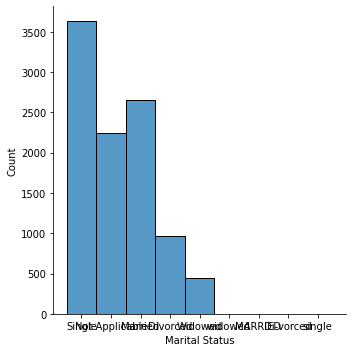

In [ ]:
#Fill NA values with Not Applicable so they are not read as NaN
censusData['Marital Status'].fillna("Not Applicable", inplace = True)
#Create a 'Before' graph for presentation 
maritalBefore = sns.displot(censusData, x = 'Marital Status')

In [ ]:
#Check for empty strings
censusData[censusData['Marital Status'] =='']
censusData[censusData['Marital Status'] ==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [ ]:
#Check that the marital status are reasonable
print(censusData['Marital Status'].unique()) #multiple forms has to be occured which needs to be handled

['Single' 'Not Applicable' 'Married' 'Divorced' 'Widowed' 'widowed'
 'MARRIED' 'Di-vorced' 'single']


In [ ]:
#Correct MaritalStatus 
censusData['Marital Status'].replace('Di-vorced', 'Divorced', inplace = True)
censusData['Marital Status'].replace('widowed', 'Widowed', inplace = True)
censusData['Marital Status'].replace('single', 'Single', inplace = True)
censusData['Marital Status'].replace('MARRIED', 'Married', inplace = True)

In [ ]:
#Next check if everyone under the age of 18 has not applicable as their marital status
maritalStatusNotNA = censusData[~censusData['Marital Status'].str.contains('Not Applicable')]
maritalStatusNotNA[maritalStatusNotNA['Age'] < 16]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2129,36,Ripon Lane,christopher,Jackson,2.0,Head,Divorced,Male,Health and safety inspector,None,Christian


Since under at age of 2 no one can be divorced, its look like Martial status is wrong, but if we look at his occupation we can conclude that his age is wrongly inputted not his martial status.

In [ ]:
#For row 2129
censusData.groupby(['Marital Status'])['Age'].mean() #checking mean age of divorced individuals

Marital Status
Divorced          43.593750
Married           50.568252
Not Applicable     8.851695
Single            38.181205
Widowed           65.641723
Name: Age, dtype: float64

In [ ]:
#setting with mean Divorced age
censusData.at[2129, 'Age'] = 43.59 # Set to 

In [ ]:
#checking
print(censusData['Marital Status'].unique())

['Single' 'Not Applicable' 'Married' 'Divorced' 'Widowed']


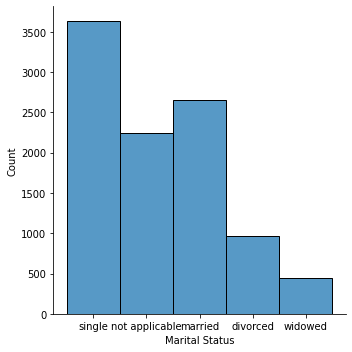

In [ ]:
conversion.convertToLower(censusData, 'Marital Status')

maritalAfter = sns.displot(censusData, x = 'Marital Status')

### <b>Gender</b>

In [ ]:
#convert to lower case to avoid issues with Male MALE male and whatnot
conversion.convertToLower(censusData, 'Gender')

#Check the unique values are reasonable
print(censusData['Gender'].unique()) #multiple forms has to be occured which needs to be handled

['male' 'female' ' ' 'fe-male' 'mal e' 'fema le' 'fem-ale']


In [ ]:
censusData['Gender'].replace('fema le', 'female', inplace = True)
censusData['Gender'].replace('fem-ale', 'female', inplace = True)
censusData['Gender'].replace('fe-male', 'female', inplace = True)
censusData['Gender'].replace('mal e', 'male', inplace = True)

In [ ]:
#Now check if any data is missing from the Gender column
censusData[~censusData['Gender'].str.contains('male|female')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
77,25,May Road,vincent,Edwards,54.0,Husband,married,,Management consultant,None,Catholic


Relationship to head of house on record with no gender is Husband so can assume Vincent is male

In [ ]:
#For row 77

censusData['Gender'][77] = 'male'
censusData.iloc[77] #Check that is corrected

House Number                                        25
Street                                        May Road
First Name                                     vincent
Surname                                        Edwards
Age                                               54.0
Relationship to Head of House                  Husband
Marital Status                                 married
Gender                                            male
Occupation                       Management consultant
Infirmity                                         None
Religion                                      Catholic
Name: 77, dtype: object

In [ ]:
#Looks good, convert the column to string now
conversion.convertToString(censusData, 'Gender')

NUMBER OF ERRORS: 0


[]

<b>Religion</b>

In [ ]:
#Corrct NA Values to Not Applicable as reasonable answer
censusData['Religion'].fillna("Not Applicable", inplace = True) #Correct the prev missing values.

#Convert to lower
conversion.convertToLower(censusData, 'Religion')

In [ ]:
#Check unique values for religion are reasonable
print(censusData['Religion'].unique()) #no multiple forms found

['methodist' 'none' 'not applicable' 'christian' 'catholic' 'jewish'
 'muslim' 'sikh' ' ' 'private' 'sith' 'jedi' 'housekeeper' 'quaker'
 'pagan']


In [ ]:
#It seems like the best options here are to use most occuring or Not Applicable 
#If they are going to fill it out with silly values then its likely religion is not applicable
censusData['Religion'].replace("housekeeper", 'not applicable', inplace = True)
print(censusData['Religion'].unique())

['methodist' 'none' 'not applicable' 'christian' 'catholic' 'jewish'
 'muslim' 'sikh' ' ' 'private' 'sith' 'jedi' 'quaker' 'pagan']


In [ ]:
#Check for blank spaces
censusData[censusData['Religion'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
514,22,Corporation Lane,peter,Ellis,50.0,Head,single,male,Wellsite geologist,None,
8993,141,Slater Drive,elaine,Taylor,37.0,Head,married,female,Unemployed,None,
9431,6,Shaw Union,tom,Johnson,40.0,Husband,married,male,Speech and language therapist,None,


In [ ]:
#It seems like the best options here are to use Not Applicable since all of them are above 18
censusData['Religion'].replace(' ' , 'not applicable', inplace = True)

### <b>Infirmity</b>

In [ ]:
#Check unique values for religion are reasonable
print(censusData['Infirmity'].unique()) #no multiple forms found

['None' 'Mental Disability' ' ' 'Blind' 'Disabled' 'Physical Disability'
 'Deaf' 'Unknown Infection']


In [ ]:
#Check for blank space
censusData[censusData['Infirmity'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
259,10,Corporation Road,dominic,Allen,42.0,Head,single,male,Financial controller,,none
907,24,Hutchinson Spring,sandra,Miller,55.0,Head,divorced,female,Unemployed,,christian
2011,1,Long Port,catherine,Johnson,79.0,Wife,married,female,Retired Radio producer,,none
2524,9,Tannery Street,hazel,Evans,9.0,Daughter,not applicable,female,Student,,not applicable
2605,18,Tannery Street,harry,Johnston,41.0,Son,single,male,Science writer,,catholic
2717,37,Tannery Street,dorothy,Robertson,14.0,Daughter,not applicable,female,Student,,not applicable
3100,98,Tannery Street,jade,Bradley,34.0,Head,married,female,"Engineer, manufacturing systems",,methodist
3241,120,Tannery Street,bryan,Fisher,47.0,Son,single,male,Information systems manager,,none
3606,175,Tannery Street,vanessa,Lloyd,3.0,Daughter,not applicable,female,Child,,not applicable
4286,9,Sheffield Parkways,margaret,Howell,22.0,None,single,female,University Student,,none


In [ ]:
#Fill missing values for Infirmity with Not Specified 
censusData['Infirmity'].replace(' ', 'Not Specified', inplace = True)

In [ ]:
#Convert to lower
conversion.convertToLower(censusData, 'Infirmity')

### <b>Relationship to Head of House</b>

In [ ]:
#Check for reasonable answers
print(censusData['Relationship to Head of House'].unique()) #no multiple forms found

['Head' 'Partner' 'Daughter' 'Wife' 'Husband' 'Grandson' 'Granddaughter'
 'Sibling' 'Lodger' 'Son' 'None' 'Adopted Daughter' 'Cousin'
 'Step-Daughter' 'Visitor' 'Step-Son' 'Adopted Son' 'Nephew' ' ' 'Neice'
 'Adopted Grandson']


In [ ]:
#Convert to lower
conversion.convertToLower(censusData, 'Relationship to Head of House')

#Check for blank space
censusData[censusData['Relationship to Head of House'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2723,38,Tannery Street,eric,Barnes,5.0,,not applicable,male,Student,none,not applicable
4717,72,Capricorn Road,joyce,Mellor,34.0,,single,female,"Horticulturist, amenity",none,none
9007,146,Slater Drive,helen,King,13.0,,not applicable,female,Student,none,not applicable


In [ ]:
#For row 2723
censusData.loc[(censusData['House Number'] == 38) & (censusData['Street'] == 'Tannery Street')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2720,38,Tannery Street,kayleigh,Barnes,36.0,head,divorced,female,"Designer, exhibition/display",none,christian
2721,38,Tannery Street,rita,Barnes,9.0,daughter,not applicable,female,Student,none,not applicable
2722,38,Tannery Street,carolyn,Barnes,7.0,daughter,not applicable,female,Student,none,not applicable
2723,38,Tannery Street,eric,Barnes,5.0,,not applicable,male,Student,none,not applicable
2724,38,Tannery Street,janice,Barnes,1.0,daughter,not applicable,female,Child,none,not applicable


In [ ]:
#3 other people who have relationship with Kayleigh are daughters, so judging from gender Eric is the son
censusData.at[2724, 'Relationship to Head of House'] = 'son' # Set to son

In [ ]:
#For row 4718
censusData.loc[(censusData['House Number'] == 72) & (censusData['Street'] == 'Capricorn Road')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4716,72,Capricorn Road,toby,Walsh,38.0,head,single,male,"Programme researcher, broadcasting/film/video",none,catholic
4717,72,Capricorn Road,joyce,Mellor,34.0,,single,female,"Horticulturist, amenity",none,none


In [ ]:
#1 other person lives in house 72, since both are single setting relationship to none
censusData.at[4718, 'Relationship to Head of House'] = 'none' # Set to none

In [ ]:
#For row 9009
censusData.loc[(censusData['House Number'] == 146) & (censusData['Street'] == 'Slater Drive')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9005,146,Slater Drive,lewis,King,52.0,head,married,male,Field trials officer,none,none
9006,146,Slater Drive,rosemary,King,48.0,wife,married,female,"Psychologist, educational",none,none
9007,146,Slater Drive,helen,King,13.0,,not applicable,female,Student,none,not applicable
9008,146,Slater Drive,jade,King,13.0,daughter,not applicable,female,Student,none,not applicable


In [ ]:
#3 other person lives in house 146, judging from relationship and gender setting value daughter
censusData.at[9009, 'Relationship to Head of House'] = 'daughter' # Set to sdaughter

In [ ]:
#Checking that head of each  household is over 18 
isHeadofHousehold = censusData[censusData['Relationship to Head of House'].str.contains('Head|head')]
isHeadofHousehold[isHeadofHousehold['Age']<18]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4322,21,Sheffield Parkways,tony,Jones,17.0,head,single,male,Unemployed,none,not applicable
4632,21,Capricorn Road,janet,Brown,16.0,head,single,female,Unemployed,none,not applicable
8661,10,Slater Drive,lorraine,Wright,17.0,head,married,female,Student,none,not applicable


In [ ]:
#Since head cant be under 18 so replacing with none
censusData.at[4322, 'Relationship to Head of House'] = 'none'
censusData.at[4632, 'Relationship to Head of House'] = 'none'
censusData.at[8661, 'Relationship to Head of House'] = 'none'

In [ ]:
#Convert to lower
conversion.convertToLower(censusData, 'Relationship to Head of House')

### <b>Occupation</b>

In [ ]:
#Convert to lower
conversion.convertToLower(censusData, 'Occupation')

In [ ]:
#Check for reasonable answers
print(censusData['Occupation'].unique()) #no multiple forms found

['public relations account executive' 'sports coach' 'student' ...
 'retired teacher, special educational needs'
 'retired designer, jewellery' 'retired equality and diversity officer']


In [ ]:
#Check Missing
censusData[censusData['Occupation'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
298,2,Henry Run,sam,Williams,40.0,husband,married,male,,none,christian
2610,20,Tannery Street,sally,Wilkinson,38.0,head,married,female,,none,christian
9747,15,Hunter Prairie,shaun,Griffiths,27.0,head,single,male,,none,christian


In [ ]:
#We fill occupation with most common occupation of others of a similar age but in reality there is no way of knowing their true employement so,
censusData.at[298, 'Occupation'] = 'not specified'
censusData.at[2610, 'Occupation'] = 'not specified'
censusData.at[9747, 'Occupation'] = 'not specified'

### <b>Street</b>

In [ ]:
conversion.convertToLower(censusData, 'Street')

In [ ]:
#Check Missing
censusData[censusData['Street'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### <b>Surname</b>

In [ ]:
conversion.convertToLower(censusData, 'Surname')

In [ ]:
#Check for empty
censusData[censusData['Surname'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7487,57,hazel creek,hannah,,30.0,head,married,female,unemployed,none,catholic


In [ ]:
#57 hazel creek, hannah	 aged 30.0 missing a surname, find whoever lives at her house and see if its likely they share a name
censusData.loc[(censusData['House Number'] == 57)&(censusData['Street'] == 'hazel creek')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7487,57,hazel creek,hannah,,30.0,head,married,female,unemployed,none,catholic
7488,57,hazel creek,terence,brookes,27.0,husband,married,male,financial planner,none,catholic
7489,57,hazel creek,maurice,brookes,1.0,son,not applicable,male,child,none,not applicable
7490,57,hazel creek,julian,mclean,49.0,lodger,single,male,"conservator, furniture",none,catholic


In [ ]:
#Looks to be one family where she is the head hence her surename most probaliy be brookes, other is alodger so ignoring him
censusData.at[7487, 'Surname'] = 'brookes'

### <b>Convert to strings</b>

In [ ]:
#Finally
conversion.convertToString(censusData, 'Street')
conversion.convertToString(censusData, 'First Name')
conversion.convertToString(censusData, 'Surname')
conversion.convertToString(censusData, 'Relationship to Head of House')
conversion.convertToString(censusData, 'Marital Status')
conversion.convertToString(censusData, 'Gender')
conversion.convertToString(censusData, 'Occupation')
conversion.convertToString(censusData, 'Infirmity')
conversion.convertToString(censusData, 'Religion')

NUMBER OF ERRORS: 0
NUMBER OF ERRORS: 0
NUMBER OF ERRORS: 0
NUMBER OF ERRORS: 0
NUMBER OF ERRORS: 0
NUMBER OF ERRORS: 0
NUMBER OF ERRORS: 0
NUMBER OF ERRORS: 0
NUMBER OF ERRORS: 0


[]

## **Step Three -  Analysis & Visualization**

This step is split up into multiple parts; Age, Religion, Marriage, Housing, Student Data, Unemployment Data. 
There may also be some overlap in these areas. 

### <b>Age</b>

In [ ]:
#Calculate the average age
averageAge = censusData['Age'].mean()
print(f'The Average age is: {round(averageAge,2)}')

#Find the most commonly occuring age
modeAge = censusData['Age'].mode()
print(f'The most commonly occuring age is: {modeAge}')

The Average age is: 36.62
The most commonly occuring age is: 0    19.0
dtype: object


In [ ]:
#The Number of people born this year
underOne = censusData['Age'] < 1
print(f'Amount of people born this year: {underOne.sum()}')


#Birth Rate per 100,000 pop 
multiplier = 100000/len(censusData)
birthRate = underOne.sum()*multiplier
print(f'Birth rate per 100,000 population is: {round(birthRate,2)}')

#Number of people born prev year
oneToTwo = censusData['Age'].between(1,1.9)
prevBirthRate = oneToTwo.sum()*multiplier
print(f"Previous year's birth rate is: {round(prevBirthRate,2)}")

#Number of people born 2 years ago 
twoToThree = censusData['Age'].between(2, 2.9)
twoPrevBirthRate = twoToThree.sum()*multiplier
print(f"The Birth Rate 2 Years ago was: {round(twoPrevBirthRate,2)}")

#Number of people born 3 years ago 
threeToFour = censusData['Age'].between(3, 3.9)
threePrevBirthRate = threeToFour.sum()*multiplier
print(f"The Birth Rate 3 Years ago was: {round(threePrevBirthRate,2)}")

#BirthRate Difference 
diff = birthRate - prevBirthRate
pcDiff = (diff/prevBirthRate)*100
print(f'The birth rate for this year is {round(pcDiff,2)}% different from last year')
prevDiff = prevBirthRate - twoPrevBirthRate
pcPrevDiff = (prevDiff/twoPrevBirthRate)*100
print(f'The difference between the last two years birth rates is: {round(pcPrevDiff,2)}%')

Amount of people born this year: 100
Birth rate per 100,000 population is: 1006.54
Previous year's birth rate is: 905.89
The Birth Rate 2 Years ago was: 1056.87
The Birth Rate 3 Years ago was: 1157.52
The birth rate for this year is 11.11% different from last year
The difference between the last two years birth rates is: -14.29%


In [ ]:
#Amount of School/College Aged children
schoolAged = censusData['Age']<=16
print(f'The amount of school aged children is: {schoolAged.sum()}')

#Percentage of School aged children
pcSchoolAged = (schoolAged.sum()/len(censusData))*100
print(f'The percentage of people in the cenus who are aged to be at school: {round(pcSchoolAged,2)}%')

The amount of school aged children is: 2129
The percentage of people in the cenus who are aged to be at school: 21.43%


In [ ]:
elderAged = censusData['Age']>= 64 #assumming
print(f'The amount of elders: {elderAged.sum()}')
pcElder = (elderAged.sum()/len(censusData))*100
print(f'Percentage of elders in this census: {round(pcElder,2)}%')

#Want to see how many elders at next  census aprox, happens every 10 years, so from 54-64
newElders = censusData['Age'].between(54, 64)
print(f'In the next census there will be aprox {newElders.sum()} more elders')
pcNewElder = (newElders.sum()/len(censusData))*100
print(f'Percentage of new elders over next 10 years : {round(pcNewElder,2)}%')

#uk average age of death is 81.16
deathCandidates = censusData['Age'] >= 81
print(f'Death count : {deathCandidates.sum()}')

The amount of elders: 1242
Percentage of elders in this census: 12.5%
In the next census there will be aprox 1111 more elders
Percentage of new elders over next 10 years : 11.18%
Death count : 239


[100, 90, 105, 115]


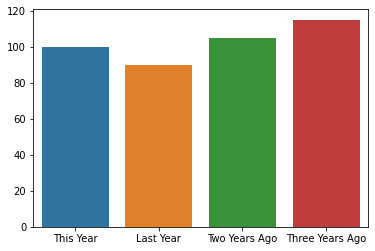

In [ ]:
#Population over last few years

x = [underOne.sum(), oneToTwo.sum(), twoToThree.sum(), threeToFour.sum()]
y = ['This Year', 'Last Year', 'Two Years Ago', 'Three Years Ago']
print(x)
sns.barplot(x = y, y = x)

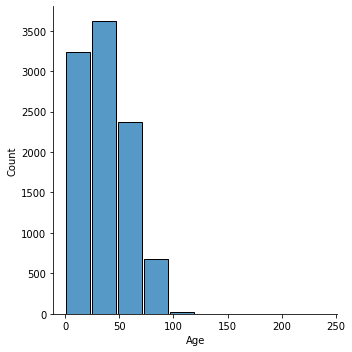

In [ ]:
#Ages of the population
ages = sns.displot(censusData, x='Age', bins = 10, shrink = .9)

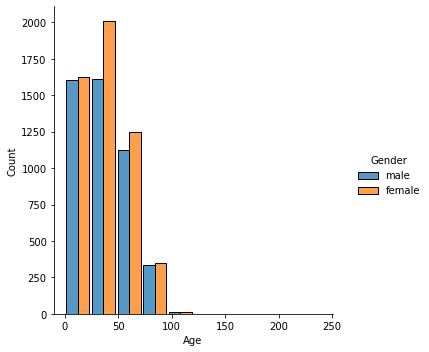

In [ ]:
#Ages by Gender
sns.displot(censusData, x='Age', hue='Gender', bins = 10, shrink = .9, multiple = 'dodge')

### <b>Religion</b>

In [ ]:
#Most common religion
mostCommon = censusData['Religion'].mode()
print(f'The most common religion is: {mostCommon}')

#Religion by count
religionNumbers = censusData['Religion'].value_counts()
print(f'Number of people per religion in census: \n{religionNumbers}')

The most common religion is: 0    none
dtype: object
Number of people per religion in census: 
none              3354
not applicable    2301
christian         2292
catholic          1096
methodist          668
muslim             116
sikh                60
jewish              43
private              1
sith                 1
jedi                 1
quaker               1
pagan                1
Name: Religion, dtype: int64


In [ ]:
#Marriages per religion 
isMarried = censusData[censusData['Marital Status'].str.contains('married')]
religionOfMarried = isMarried['Religion'].value_counts()
print(f'Marriages per religion: \n{religionOfMarried}')

Marriages per religion: 
none              1219
christian          788
catholic           382
methodist          194
muslim              25
sikh                17
jewish              13
not applicable      10
jedi                 1
quaker               1
pagan                1
Name: Religion, dtype: int64


In [ ]:
#Unmarried people per religion 
unmarried = censusData[censusData['Marital Status'].str.contains('single|divorced|widowed|not applicable')]
unmarriedByReligion = unmarried['Religion'].value_counts()
print(f'Unmarried by Religion: \n{unmarriedByReligion}')

Unmarried by Religion: 
not applicable    2291
none              2135
christian         1504
catholic           714
methodist          474
muslim              91
sikh                43
jewish              30
private              1
sith                 1
Name: Religion, dtype: int64


In [ ]:
#Children Per Religion
isChild = censusData[censusData['Age'] <= 18]
childByReligion = isChild['Religion'].value_counts()
print(f'Children per Religion: \n{childByReligion}')

Children per Religion: 
not applicable    2291
none                70
christian           30
catholic            19
methodist            9
sikh                 2
muslim               1
Name: Religion, dtype: int64


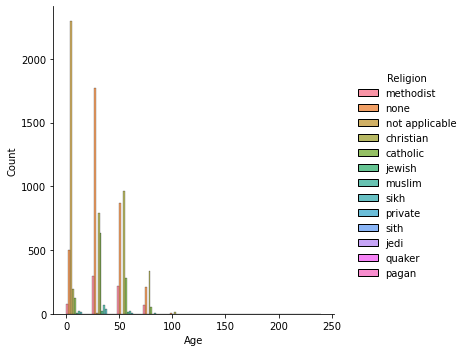

In [ ]:
sns.displot(censusData, x = 'Age', hue = 'Religion', bins = 10, multiple = "dodge")

[Text(0, 0, 'methodist'),
 Text(0, 0, 'none'),
 Text(0, 0, 'not applicable'),
 Text(0, 0, 'christian'),
 Text(0, 0, 'catholic'),
 Text(0, 0, 'jewish'),
 Text(0, 0, 'muslim'),
 Text(0, 0, 'sikh'),
 Text(0, 0, 'private'),
 Text(0, 0, 'sith'),
 Text(0, 0, 'jedi'),
 Text(0, 0, 'quaker'),
 Text(0, 0, 'pagan')]

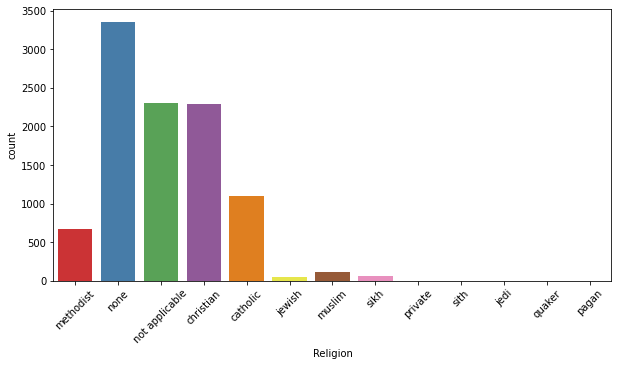

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=censusData,
    x='Religion',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

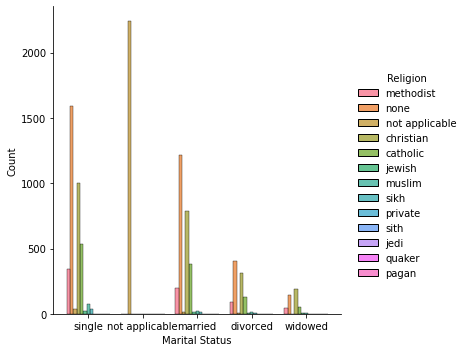

In [ ]:
#Married people per religion
sns.displot(censusData, x = 'Marital Status', shrink = .8, hue = 'Religion', multiple = "dodge")

### <b>Marital Status</b>

In [ ]:
#Calculate the number of people married
numberOfPeopleMarried = censusData['Marital Status'].str.contains('married')
print(f'Number of people married: {numberOfPeopleMarried.sum()}')

#Calculate percentage of people married
pcMarried = (numberOfPeopleMarried.sum()/len(censusData))*100
print(f'Percentage of census participants married: {round(pcMarried,2)}%')

#Calculate the percentage of population married
pcPopMarried= numberOfPeopleMarried.sum()*multiplier
print(f'Population married per 100,000: {round(pcPopMarried,2)}')

#Calculate the average age of married people 
isMarried = censusData[censusData['Marital Status'].str.contains('married')]
agesOfMarried = isMarried['Age']
print(f'The average age of someone married is: {round(agesOfMarried.mean(),2)}%')

Number of people married: 2651
Percentage of census participants married: 26.68%
Population married per 100,000: 26683.44
The average age of someone married is: 50.57%


In [ ]:
#Calculate the amount of people Divorced
numberDivorced = censusData['Marital Status'].str.contains('divorced')
print(f'Number of people Divorced: {numberDivorced.sum()}')

#Percentage of people divorced
pcDivorced = (numberDivorced.sum()/len(censusData))*100
print(f'Percentage of census participants divorced: {round(pcDivorced,2)}')

#Calculate the average age of someone divorced
isDivorced = censusData[censusData['Marital Status'].str.contains('divorced')]
agesOfDivorced = isDivorced['Age']
print(f'The average age of someone divorced is: {round(agesOfDivorced.mean(),2)}')\

Number of people Divorced: 967
Percentage of census participants divorced: 9.73
The average age of someone divorced is: 43.64


In [ ]:
#Number of women widowed
numberWidowed = censusData['Marital Status'].str.contains('widowed')
print(f'Number of women Widowed: {numberWidowed.sum()}')

Number of women Widowed: 441


[Text(0, 0, 'single'),
 Text(0, 0, 'not applicable'),
 Text(0, 0, 'married'),
 Text(0, 0, 'divorced'),
 Text(0, 0, 'widowed')]

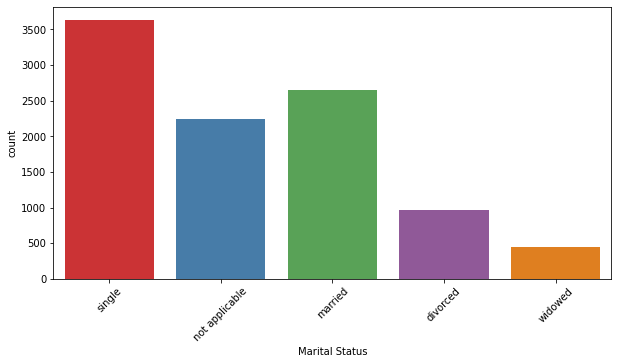

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=censusData,
    x='Marital Status',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

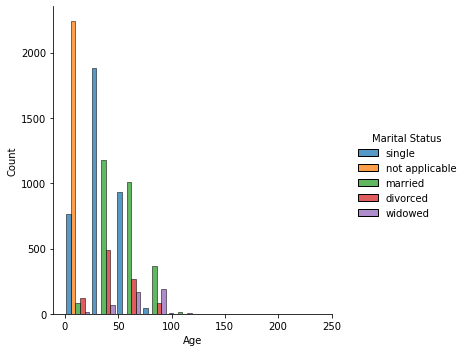

In [ ]:
#Marital Status vs age
sns.displot(censusData, x = 'Age', hue = 'Marital Status', bins = 10, shrink = .9 , multiple = 'dodge')

### <b>Housing</b>

In [ ]:
#Calculate the streets with the most houses
housing = censusData #Create a copy of censusData
conversion.convertToString(housing, 'House Number') #convert to str so can be combined
housing['Address'] = housing['House Number'] + housing['Street']
streets = housing['Street'].value_counts()

#Number of people per street
print(f'Number of people per street: \n{streets}')

NUMBER OF ERRORS: 0
Number of people per street: 
tannery street     1190
hale street         705
oak expressway      468
slater drive        397
ripon lane          387
                   ... 
black farm            5
wood folly            5
taylor inn            5
metropolis fort       5
goodluck hold         1
Name: Street, Length: 104, dtype: int64


In [ ]:
#Number of people per housse
houses = housing['Address'].value_counts()
print(f'Number of people per address: \n{houses}')

Number of people per address: 
17tannery street     22
129tannery street    21
39tannery street     20
128tannery street    20
10tannery street     19
                     ..
8white road           1
7white road           1
6white road           1
14ripon lane          1
7stoke track          1
Name: Address, Length: 3718, dtype: int64


In [ ]:
avgHouseOccupancy = houses.mean()
print(f'Average amount of people per address: {round(avgHouseOccupancy,2)}')

Average amount of people per address: 2.67


In [ ]:
censusData.groupby(['Street'])['House Number'].mean() #checking mean age of divorced individuals

Street
andrews lane         1.548523e+127
april junction       1.547273e+142
bank street           3.495241e+51
barlow fortress       1.851850e+04
bates springs        8.510102e+232
                         ...      
williams rectory      1.851850e+04
wood folly            2.222200e+03
woodward crossing    1.523761e+130
wright glen           1.011112e+09
yucca vista           1.223346e+08
Name: House Number, Length: 104, dtype: float64

### <b>Students</b>

In [ ]:
#Amount of students
noOfStudents = censusData['Occupation'].str.contains('student')
print('Number of students: ',noOfStudents.sum())

StudentPc = (noOfStudents.sum()/len(censusData))*100
print(f'Percentage of census participants who are students: {round(StudentPc,2)}%')

Number of students:  2529
Percentage of census participants who are students: 25.46%


In [ ]:
#Amount of students of university age
students = censusData[censusData['Occupation'].str.contains('student')]
uniAgeStudents = students['Age'] >= 18
print(f'Number of university aged students: {uniAgeStudents.sum()}')

#Students as a percentage of the population
uniStudentPc = (uniAgeStudents.sum()/len(censusData))*100
print(f'Percentage of census participants who are university aged students: {round(uniStudentPc,2)}%')

Number of university aged students: 832
Percentage of census participants who are university aged students: 8.37%


In [ ]:
Occupationplt = censusData
Occupation = Occupationplt['Occupation'].value_counts()
Occupation

student                                             1834
university student                                   678
unemployed                                           623
child                                                544
medical physicist                                     20
                                                    ... 
retired teacher, english as a foreign language         1
retired conservation officer, historic buildings       1
retired surveyor, minerals                             1
retired therapist, occupational                        1
retired equality and diversity officer                 1
Name: Occupation, Length: 1129, dtype: int64

In [ ]:
Notstudent = censusData['Age']>= 25 #assumming
print(f'The amount of Non-student: {Notstudent.sum()}')
NotstudentPc = (Notstudent.sum()/len(censusData))*100
print(f'Percentage of elders in this census: {round(NotstudentPc,2)}%')

The amount of Non-student: 6580
Percentage of elders in this census: 66.23%


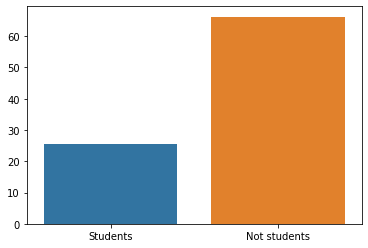

In [ ]:
# Student vs Not Student
x = [StudentPc, NotstudentPc]
y = ['Students', 'Not students']
sns.barplot(x = y, y = x)

<b>Unemployment</b>

In [ ]:
#amount of unemployed
noUnemployed = censusData['Occupation'].str.contains('unemployed')
print(f'No of people unemployed: {noUnemployed.sum()}')
#percentage of pop unemployed
unemployedPc = (noUnemployed.sum()/len(censusData))*100
print(f'Percentage of census participants who are unemployed : {round(unemployedPc,2)}%')
popUnemployed = noUnemployed.sum()*multiplier
pcPopUnemployed = (popUnemployed/100000)*100
print(f'Percentage of pop per 100,000: {round(pcPopUnemployed,2)}%')

No of people unemployed: 623
Percentage of census participants who are unemployed : 6.27%
Percentage of pop per 100,000: 6.27%


In [ ]:
#Careers 
#Employed, Unemployed, Student, Retired, Child
employed = censusData[~censusData['Occupation'].str.contains('unemployed|student|child|retired')]
retired = censusData['Occupation'].str.contains('retired')
child = censusData['Occupation'].str.contains('child')

employedCount = employed['Occupation'].count()
unemployedCount = noUnemployed.sum()
retiredCount = retired.sum()
studentCount = noOfStudents.sum()
childCount = child.sum()
streetcount = len(censusData['Street'].unique())

In [ ]:
print(f'No of people employed: {employedCount.sum()}')
#percentage of pop employed
employedCountPc = (employedCount.sum()/len(censusData))*100
print(f'Percentage of census participants who are employed : {round(employedCountPc,2)}%')

No of people employed: 5292
Percentage of census participants who are employed : 53.27%


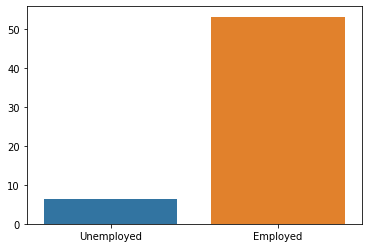

In [ ]:
# unemployment vs employment
x = [unemployedPc, employedCountPc]
y = ['Unemployed', 'Employed']
sns.barplot(x = y, y = x)

In [ ]:
noUnemployed = censusData.loc[censusData['Occupation'] == 'unemployed']
noUnemployed

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address
7,4,may road,marie,james,54.0,head,married,female,unemployed,none,none,4may road
25,10,may road,elliot,buckley,34.0,husband,married,male,unemployed,none,catholic,10may road
29,11,may road,charlie,smart,42.0,husband,married,male,unemployed,none,none,11may road
101,32,may road,jacqueline,porter,35.0,head,divorced,female,unemployed,none,methodist,32may road
106,33,may road,beverley,mckenzie,30.0,head,divorced,female,unemployed,none,methodist,33may road
...,...,...,...,...,...,...,...,...,...,...,...,...
9826,2,gracebond lane,kirsty,holland,57.0,lodger,single,female,unemployed,none,none,2gracebond lane
9831,5,gracebond lane,rita,cooper,59.0,head,divorced,female,unemployed,none,none,5gracebond lane
9847,1,ebor warehouse,annette,thompson-jones,19.0,daughter,single,female,unemployed,blind,methodist,1ebor warehouse
9894,1,east hold,christopher,whittaker,45.0,son,single,male,unemployed,none,christian,1east hold


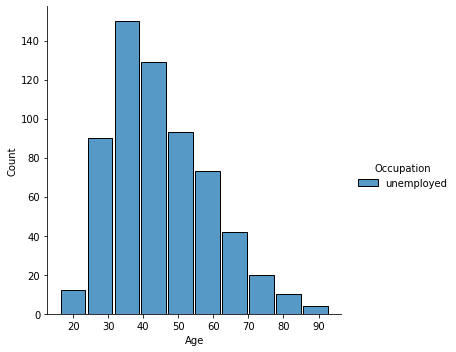

In [ ]:
#Occupation with age
sns.displot(noUnemployed, x = 'Age', hue = 'Occupation', bins = 10, shrink = .9 , multiple = 'dodge')

Ages between 25 and 55 are more likely to be unemployed than others. If we ignore childs, students and elders.

### **Infirmity**

In [ ]:
#Most common infirmity
mostCommon = censusData['Infirmity'].mode()
print(f'The most common infirmity is: {mostCommon}')

#infirmity by count
infirmityNumbers = censusData['Infirmity'].value_counts()
print(f'Number of people per infirmity in census: \n{infirmityNumbers}')

The most common infirmity is: 0    none
dtype: object
Number of people per infirmity in census: 
none                   9836
physical disability      20
deaf                     16
not specified            15
blind                    14
mental disability        12
disabled                 12
unknown infection        10
Name: Infirmity, dtype: int64


In [ ]:
infirmityNumberstPc = (infirmityNumbers/len(censusData))*100
print(f'Percentage of census participants who are employed : {infirmityNumberstPc}%')

Percentage of census participants who are employed : none                   99.003523
physical disability     0.201309
deaf                    0.161047
not specified           0.150981
blind                   0.140916
mental disability       0.120785
disabled                0.120785
unknown infection       0.100654
Name: Infirmity, dtype: float64%


99 % people have no infirmity

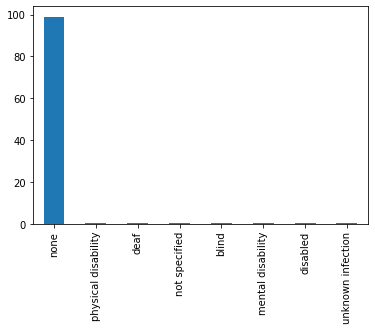

In [ ]:
infirmityNumberstPc.plot(kind='bar')
plt.show()

**From Above Extensive Analysis we can answer the following questions**

### **(a) What should be built on an unoccupied plot of land that the local government wishes to develop?**
	(i) High-density housing. This should be built if the population is significantly expanding.
	(ii) Low-density housing. This should be built if the population is “affluent” and there is demand for large family housing.
	(iii) Train station. There are potentially a lot of commuters in the town and building a train station could take pressure off the roads. But how will you identify commuters?
	(iv) Religious building. There is already one place of worship for Catholics in the town. Is there demand for a second Church (if so, which denomination?), or for a different religious building?
	(v) Emergency medical building. Not a full hospital, but a minor injuries centre. This should be built if there are many injuries or future pregnancies likely in the population. 
	(vi) Something else? 


“Unoccupied plot of land that the local government wishes to develop should be ‘Train Station’ as there are potentially a lot of commuters in the town and building a train station could take pressure off the roads.”


### **(b)Which one of the following options should be invested in?**

	(i) Employment and training. If there is evidence for a lot of unemployment, we should re-train people for new skills. 
	(ii) Old age care. If there is evidence for increasing numbers of retired people in future years, the town will need to allocate more funding for end of life care. 
	(iii) Increase spending for schooling. If there is evidence of a growing population of school-aged children (new births, or families moving in to the town), then schooling spend should increase. 
	(iv) General infrastructure. If the town is expanding, then services (waste collection; road maintenance, etc.) will require more investment. 


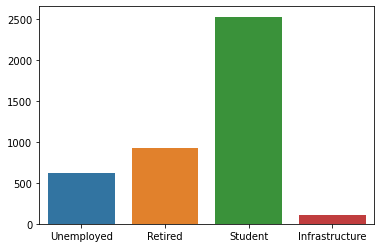

In [ ]:
# unemployment vs retired people vs school-aged children vs infrastructure
x = [unemployedCount, retiredCount, studentCount,streetcount]
y = ['Unemployed', 'Retired', 'Student','Infrastructure']
sns.barplot(x = y, y = x)

“Increase spending for schooling should be invested in as population of school-aged children is increasing and their population is far above any other targeted population with an increase of 11% from past year”

Above answer is concluded after extensive analysis and research of data for each choice given in the question.  Every important step and discovery from analytics of data is mentioned below with extensive details.
